#Construindo um modelo de Regressão para marketing
##Desafio:
Uma empresa está investindo mensalmente em plataformas de publicidade online, como Youtube, Facebook e newspaper, para a prospecção de leads (pessoas interessadas em seus produtos). A fim de acompanhar o desempenho desses investimentos, a empresa registra todos os gastos com publicidade e todos os retornos de vendas gerados a partir desses investimentos. Para entender melhor a relação entre as variáveis presentes nesses registros e identificar os fatores que mais impactam na geração de leads, a empresa solicitou a análise de um especialista em dados. Além disso, a empresa busca criar um modelo de predição de valores para estimar o retorno de vendas que pode ser gerado a partir de um determinado investimento em publicidade.


**Marcelo França Júnior #143970**


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Import das bibliotecas:

*   Pandas para a Manipulação dos Dados.
*   SeaBorn para Análise Exploratória.
*   MatPlotLib para visualização da Predição.






In [2]:
mkt_ds = pd.read_csv("/content/drive/MyDrive/Cursos/DNC/Desafio 4/MKT.csv")

Carregando a base de dados.

In [ ]:
mkt_ds

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88
...,...,...,...,...
166,45.84,4.44,16.56,9.12
167,113.04,5.88,9.72,11.64
168,212.40,11.16,7.68,15.36
169,340.32,50.40,79.44,30.60


Visualização prévia dos dados em cada coluna.

In [ ]:
mkt_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


Nenhum dados nulo no Dataset.

In [ ]:
mkt_ds.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


Notei que o maior investimento é realizado na plataforma Youtube, seguido por jornal e por último, Facebook.

In [ ]:
retorno_positivo = mkt_ds.query("(youtube+facebook+newspaper)<sales")
retorno_positivo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    0 non-null      float64
 1   facebook   0 non-null      float64
 2   newspaper  0 non-null      float64
 3   sales      0 non-null      float64
dtypes: float64(4)
memory usage: 0.0 bytes


Resutado de vendas é sempre menor que o investido.

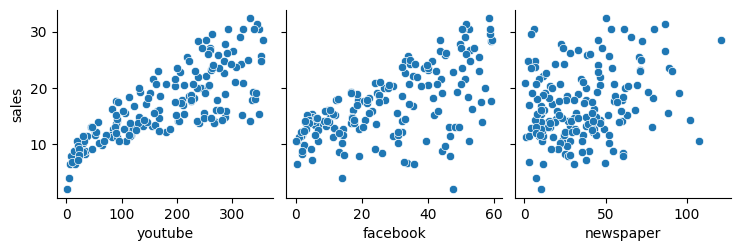

In [ ]:
sns.pairplot(mkt_ds, x_vars= ['youtube', 'facebook', 'newspaper'], y_vars="sales")

*   Youtube: Retorno linear
*   Facebook: Retorno linear
*   Newspaper: Retorno não linear



<Axes: >

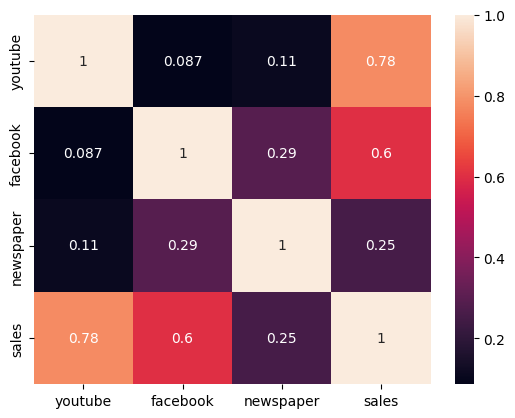

In [ ]:
sns.heatmap(mkt_ds.corr(), annot=True)

* Youtube é a plataforma com mais investimento e correspondência de retorno.
* Facebook é a plataforma com menos investimento e com correspondência de retorno média.
* Jornal é a segunda plataforma com mais investimento e não possui correspondência de retorno significativa.


In [ ]:
platforms = mkt_ds[['youtube', 'facebook', 'newspaper']]

sales = mkt_ds[["sales"]]

Separando a tabela "mkt_ds", em outras duas novas, para criar o modelo de regressão.



In [ ]:
from sklearn.model_selection import train_test_split
platforms_train, platforms_test, sales_train, sales_test = train_test_split(platforms, sales, train_size = 0.7, test_size = 0.3, random_state = 42)

Separando os dados das duas novas tabelas de forma aleatória, em uma proporção de 70% para treino e 30 % para teste.

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

Importando a função de regressão linear.

In [ ]:
lm.fit(platforms_train, sales_train)

LinearRegression()

Treinando a Regressão.



In [ ]:
sales_pred = lm.predict(platforms_test)

Usando a tabela de teste para criar uma expectativa de vendas.

In [ ]:
from sklearn.metrics import r2_score
r = r2_score(sales_test, sales_pred)
print(f'Predição: {r*100:.2f}%')

Predição: 88.24%


Precisão da regressão foi alta! Treinamento deu certo.

Text(0, 0.5, 'Valor das Vendas')

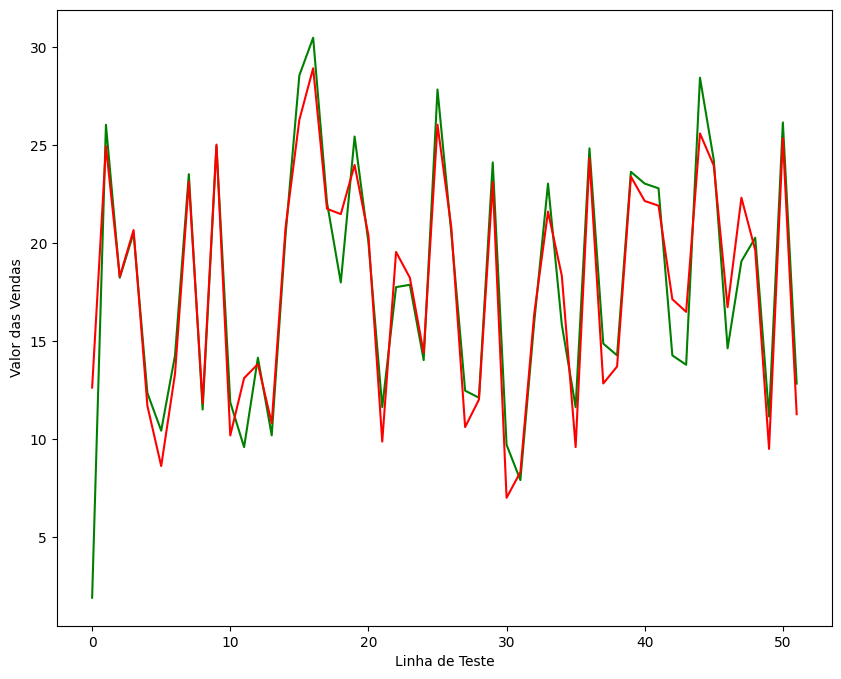

In [ ]:
x = [i for i in range(0, 52)]

fig = plt.figure(figsize=(10, 8))

plt.plot(x, sales_test, color="green")
plt.plot(x, sales_pred, color="red")

plt.xlabel("Linha de Teste")
plt.ylabel("Valor das Vendas")

Visualização gráfica da precisão da regressão.

In [ ]:
youtube = 300
facebook = 60
newspaper = 0
input = [[youtube,facebook,newspaper]]
sales = lm.predict(input)[0]

print(f'Valor previsto de vendas: R$ {sales[0]:.2f}')

Teste utilizando valores customizáveis.